In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CSVファイルからデータの読み込み
df = pd.read_csv('Band.csv')

# チャネル名の変更
df.columns = [col.replace('Filtered_', '_') for col in df.columns]
df.columns = [col.replace('Delta', 'D') for col in df.columns]
df.columns = [col.replace('Theta', 'T') for col in df.columns]
df.columns = [col.replace('Alpha', 'A') for col in df.columns]
df.columns = [col.replace('Beta', 'B') for col in df.columns]


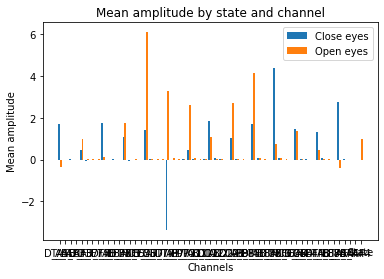

In [2]:
# 各状態での平均振幅の計算
def compute_mean_amplitude(df, start, end):
    return df.iloc[start:end].mean(axis=0)

# データの前半部分（目を閉じる状態）と後半部分（目を開ける状態）での平均振幅の計算
close_eyes = compute_mean_amplitude(df, 0, df.shape[0]//2)
open_eyes = compute_mean_amplitude(df, df.shape[0]//2, df.shape[0])

# プロット
fig, ax = plt.subplots()
index = np.arange(len(close_eyes))
bar_width = 0.35

rects1 = ax.bar(index - bar_width/2, close_eyes, bar_width, label='Close eyes')
rects2 = ax.bar(index + bar_width/2, open_eyes, bar_width, label='Open eyes')

ax.set_xlabel('Channels')
ax.set_ylabel('Mean amplitude')
ax.set_title('Mean amplitude by state and channel')
ax.set_xticks(index)
ax.set_xticklabels(df.columns)
ax.legend()

plt.show()

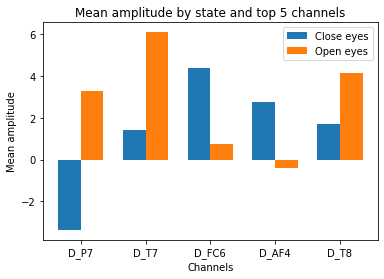

In [3]:
# 平均振幅の差分を計算
difference = np.abs(close_eyes - open_eyes)

# 差分が最も大きいトップ5のチャンネルを選択
top_channels = difference.sort_values(ascending=False)[:5]

# 選択したチャンネルの平均振幅をプロット
fig, ax = plt.subplots()
index = np.arange(len(top_channels))
bar_width = 0.35

rects1 = ax.bar(index - bar_width/2, close_eyes[top_channels.index], bar_width, label='Close eyes')
rects2 = ax.bar(index + bar_width/2, open_eyes[top_channels.index], bar_width, label='Open eyes')

ax.set_xlabel('Channels')
ax.set_ylabel('Mean amplitude')
ax.set_title('Mean amplitude by state and top 5 channels')
ax.set_xticks(index)
ax.set_xticklabels(top_channels.index)
ax.legend()

plt.show()